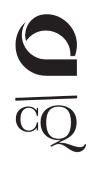

# Quantinuum Circuit Submissions via pytket

This notebook contains basic circuit submission examples to Quantinuum quantum hardware via `pytket`.

* [Step by Step](#step-by-step)
* [Additional Features](#additional-features)

## Step by Step <a class="anchor" id="step-by-step"></a>

### Circuit Preparation

Create your circuit via the pytket python library. For details on getting started with `pytket`, see pytket's [Getting Started](https://cqcl.github.io/tket/pytket/api/getting_started.html) page.

In [2]:
from pytket.circuit import Circuit, fresh_symbol
from pytket.circuit.display import render_circuit_jupyter

# Set up Bell Test
circuit = Circuit(2)
circuit.H(0)
circuit.CX(0, 1)
circuit.measure_all()

render_circuit_jupyter(circuit)

### Select Device

See the *Quantinuum Systems User Guide* in the *Examples* tab on the *Quantinuum User Portal* for information on each of the systems listed below.

*Available machines:*
- `H1-1`, `H1-2`: Quantum Computers, submit specifically to H1-1 or H1-2 by using the machine name
- `H1-1E`, `H1-2E`: Device-specific Emulators
- `H1-1SC`, `H1-2SC`: Device-specific Syntax Checkers check compilation of a quantum circuit against hardware-specific instructions, returns all `0` strings if the circuit syntax is correct. Syntax Checkers are specific to the device. 
- `H1`: Submit to Quantinuum System Model H1 machines, job is run on H1-1 or H1-2 based on soonest available

Login to the Quantinuum API using your credentials and check the device status.

In [1]:
from pytket.extensions.quantinuum import QuantinuumBackend

machine = 'HQS-LT-S1-SIM'
# machine = 'H1-1E'

backend = QuantinuumBackend(device_name=machine)

### Circuit Compilation

`pytket` includes many features for optimizing circuits. This includes reducing the number of gates where possible and resynthesizing circuits for a quantum computer's native gate set. See the `pytket` [User Manual](https://cqcl.github.io/pytket/manual/index.html) for more information on all the options that are available.

In [3]:
# Compile the circuit: this includes optimizing the gates and resynthesizing the circuit to Quantinuum's native gate set.
# `optimisation_level` sets the level of optimisation to perform during compilation, check pytket documentation for more detail.  
compiled_circuit = backend.get_compiled_circuit(circuit, optimisation_level=1)

render_circuit_jupyter(compiled_circuit)

### Run the Circuit

Now the circuit can be run on Quantinuum hardware.

In [4]:
# Submit the circuit to the Quantinuum device / emulator
n_shots = 100
handle = backend.process_circuit(compiled_circuit, 
                                 n_shots=n_shots)
print(handle)

Enter your Quantinuum email: megan.l.kohagen@quantinuum.com
Enter your Quantinuum password: ········
('948235fa95b448cda41febc0f6ec1826', 'null')


Below the status of the job can be viewed.

In [5]:
status = backend.circuit_status(handle)
print(status)

CircuitStatus(status=<StatusEnum.QUEUED: 'Circuit is queued.'>, message="{'name': 'job_0', 'submit-date': '2022-03-24T21:36:20.614479', 'result-date': None, 'queue-position': None, 'cost': '5.66', 'error': None}", error_detail=None, completed_time=None, queued_time=None, submitted_time=None, running_time=None, cancelled_time=None, error_time=None, queue_position=None)


### Retrieve Results

Retrieve the results.

In [6]:
result = backend.get_result(handle)

In [7]:
result

BackendResult(q_bits={},c_bits={c[1]: 0, c[0]: 1},counts=None,shots=[[192]
 [  0]
 [192]
 [192]
 [  0]
 [192]
 [192]
 [192]
 [  0]
 [192]
 [  0]
 [192]
 [  0]
 [192]
 [192]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [  0]
 [192]
 [  0]
 [  0]
 [  0]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [  0]
 [192]
 [192]
 [  0]
 [192]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [  0]
 [192]
 [192]
 [192]
 [  0]
 [192]
 [  0]
 [192]
 [  0]
 [192]
 [192]
 [  0]
 [192]
 [  0]
 [192]
 [192]
 [128]
 [192]
 [192]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [192]
 [  0]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [192]
 [  0]
 [192]
 [  0]
 [  0]
 [  0]
 [192]
 [  0]
 [192]
 [192]
 [192]
 [  0]
 [192]
 [192]
 [192]
 [192]
 [  0]
 [  0]
 [  0]
 [192]
 [  0]
 [  0]
 [192]],state=None,unitary=None,density_matrix=None)

### Save Results

Save the results. It is recommended to save job results as soon as jobs are completed due to the Quantinuum data retention policy.

In [ ]:
import json

# with tempfile.TemporaryFile('w+') as fp:
#     json.dump(result.to_dict(), fp)
#     fp.seek(0)
#     new_res = BackendResult.from_dict(json.load(fp))
    
# with open(f'results_{result["name"]}.json', 'w') as f:
#     json.dump(result.to_dict(), f)

### Analyze Results

There are multiple options for analyzing results with pytket. A few examples are highlighted here. More can be seen at [Interpreting Results](https://cqcl.github.io/pytket/manual/manual_backend.html#interpreting-results).

In [8]:
result = backend.get_result(handle)
print(result.get_distribution())

{(0, 0): 0.5, (0, 1): 0.01, (1, 1): 0.49}


In [9]:
print(result.get_counts())

Counter({(0, 0): 50, (1, 1): 49, (0, 1): 1})


In [10]:
print(compiled_circuit.bit_readout)
print(compiled_circuit.qubit_readout)
print(compiled_circuit.qubit_to_bit_map)

{c[0]: 0, c[1]: 1}
{q[0]: 0, q[1]: 1}
{q[0]: c[0], q[1]: c[1]}


### Canceling jobs

Jobs that have been submitted can also be cancelled if needed.

In [ ]:
backend.cancel(handle)

## Additional Features <a class="anchor" id="additional-features"></a>

This section covers additional features available in `pytket`.

### Batch Submission

A batch of jobs can also be run consecutively using `process_circuits` (note the plural). For more information see [Batch Submission](https://cqcl.github.io/pytket/manual/manual_backend.html#batch-submission).

In [ ]:
machien = 'HQS-LT-S1-SIM'
# machine = 'H1-1E'
n_shots = 100

backend = QuantinuumBackend(device_name=machine)
compiled_circuit = backend.get_compiled_circuit(circuit)
handle = backend.process_circuits([compiled_circuit,
                                   compiled_circuit.copy()],
                                  n_shots=n_shots)
result = backend.get_result(handle)

### Parametrized Circuits

Parametrized circuits are common in variational algorithms. Pytket supports parameters within circuits via symbols. For more information, see [Symbolic Circuits](https://cqcl.github.io/pytket/manual/manual_circuit.html?highlight=paramet#symbolic-circuits).

In [6]:
from pytket.circuit import fresh_symbol

# Set up parametrized circuit
a = fresh_symbol('a')
circuit = Circuit(3).X(0)
circuit.CX(0,1).CX(1,2)
circuit.Rz(a, 2)
circuit.CX(1,2).CX(0,1)

render_circuit_jupyter(circuit)

Note the substitution of an actual value to the `a` variable below.

In [7]:
# Create a version of the circuit that utilizes a specific value for the variable a
simulation_circuit = circuit.copy()
simulation_circuit.measure_all()
simulation_circuit.symbol_substitution({a: -0.09})

# Compile the circuit: this includes optimizing the gates and resynthesizing the circuit to Quantinuum's native gate set
compiled_circuit = backend.get_compiled_circuit(simulation_circuit)

render_circuit_jupyter(compiled_circuit)

In [ ]:
# Submit the circuit to the Quantinuum device / emulator
n_shots = 100
handle = backend.process_circuit(compiled_circuit, 
                                 n_shots=n_shots)
result = backend.get_result(handle)

### Conditional Gates

Pytket supports conditional gates. This may be for implementing error correction or reducing noise. This capability is well-supported by Quantinuum hardware, which supports mid-circuit measurement and qubit reuse. See [Conditional Gates](https://cqcl.github.io/pytket/manual/manual_circuit.html#conditional-gates) for more information on pytket's implementation. The following example demonstrates the quantum teleportation protocol.

In [12]:
from pytket.circuit import Circuit, if_bit

# create a circuit and add quantum and classical registers
circ = Circuit()
qreg = circ.add_q_register("q", 3)
creg = circ.add_c_register("b", 2)

# prepare q[0] to be in the state |->, which we wish to teleport to q[2]
circ.X(qreg[0]).H(qreg[0])

# prepare a Bell state on qubits q[1] and q[2]
circ.H(qreg[1])
circ.CX(qreg[1], qreg[2])

# construct the teleportation protocol
circ.CX(qreg[0], qreg[1])
circ.H(qreg[0])
circ.Measure(qreg[0], creg[0])
circ.Measure(qreg[1], creg[1])

# if (creg[1] == 1)
circ.X(qreg[2], condition=if_bit(creg[1]))

# if (creg[0] == 1)
circ.Z(qreg[2], condition=if_bit(creg[0]))

render_circuit_jupyter(circ)

We can utilise pytket's [Assertion](https://cqcl.github.io/pytket/manual/manual_assertion.html#assertion) feature to verify the successful teleportation of the state $| - \rangle$.

In [15]:
from pytket.circuit import ProjectorAssertionBox
import numpy as np

# |-><-|
proj = np.array([
    [0.5, -0.5],
    [-0.5, 0.5]
])
circ.add_assertion(ProjectorAssertionBox(proj), [qreg[2]], name="debug")

In [14]:
machine = 'HQS-LT-S1-SIM'
# machine = 'H1-1E'

n_shots = 1000

backend = QuantinuumBackend(device_name=machine)
compiled_circuit = backend.get_compiled_circuit(circ)
handle = backend.process_circuit(compiled_circuit, 
                                 n_shots=n_shots)
result = backend.get_result(handle)
# Returns the success rate of the state assertion averaged across shots
# Note that the failed shots are caused by the simulated device errors
result.get_debug_info()

{'debug': 0.988}